In [1]:
%matplotlib inline
from kid_readout.measurement.io import npy

In [2]:
npd = npy.NumpyDirectory('/data/detectors/2016-11-18_152055_signal_level/')

In [3]:
npd.node_names()

['StreamArray0',
 'ADCSnap1',
 'StreamArray2',
 'ADCSnap3',
 'StreamArray4',
 'ADCSnap5',
 'StreamArray6',
 'ADCSnap7',
 'StreamArray8',
 'ADCSnap9',
 'StreamArray10',
 'ADCSnap11',
 'StreamArray12',
 'ADCSnap13',
 'StreamArray14',
 'ADCSnap15',
 'StreamArray16',
 'ADCSnap17',
 'StreamArray18',
 'ADCSnap19']

In [5]:
streams = [npd.read(name)[0] for name in npd.node_names() if name.startswith('StreamArray')]
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [6]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(1234.0, 1223.0),
 (1236.0, 1223.0),
 (1232.0, 1222.0),
 (1236.0, 1222.0),
 (1236.0, 1221.0),
 (1235.0, 1223.0),
 (1236.0, 1223.0),
 (1235.0, 1222.0),
 (1235.0, 1223.0),
 (1233.0, 1222.0)]

In [9]:
2**15

32768

In [21]:
np.log2(streams[0].roach_state.fft_shift_register + 1)

20.0

In [25]:
[(bin(stream.roach_state.fft_shift_register), np.abs(stream.s21_raw.mean())) for stream in streams]

[('0b11111111111111111111', 2088.9519),
 ('0b11111111111111111110', 4177.1401),
 ('0b11111111111111111100', 8352.6299),
 ('0b11111111111111111000', 16704.227),
 ('0b11111111111111110000', 33169.059),
 ('0b11111111111111100000', 35355.902),
 ('0b11111111111111000000', 35363.828),
 ('0b11111111111110000000', 35221.699),
 ('0b11111111111100000000', 35233.332),
 ('0b11111111111000000000', 35141.109)]

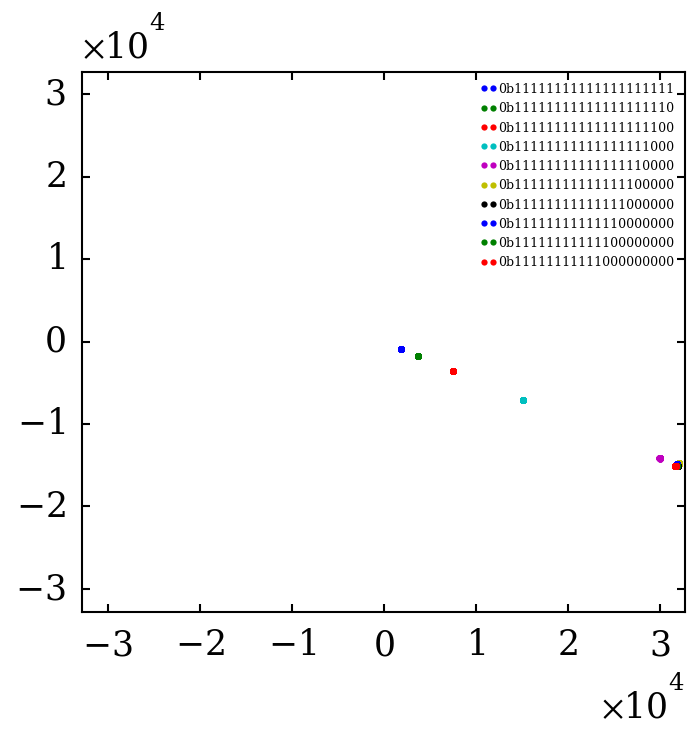

In [24]:
fig, ax = plt.subplots(figsize=(3, 3))
for stream in streams:
    ax.plot(stream.s21_raw.real, stream.s21_raw.imag, '.', label=bin(stream.roach_state.fft_shift_register))
ax.set_xlim(-2**15, 2**15)
ax.set_ylim(-2**15, 2**15)
ax.legend(loc='best', fontsize=3)